In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from yellowbrick.regressor import ResidualsPlot


In [2]:
path = '2010-23-data_sa_crime.csv'  
original_data = pd.read_csv(path)
data = original_data.copy()

In [3]:
data.head()

Reported Date Suburb - Incident Postcode - Incident  \
0     1/07/2010          ADELAIDE                5000   
1     1/07/2010          ADELAIDE                5000   
2     1/07/2010          ADELAIDE                5000   
3     1/07/2010          ADELAIDE                5000   
4     1/07/2010          ADELAIDE                5000   

  Offence Level 1 Description           Offence Level 2 Description  \
0   OFFENCES AGAINST PROPERTY  FRAUD DECEPTION AND RELATED OFFENCES   
1   OFFENCES AGAINST PROPERTY     PROPERTY DAMAGE AND ENVIRONMENTAL   
2   OFFENCES AGAINST PROPERTY             SERIOUS CRIMINAL TRESPASS   
3   OFFENCES AGAINST PROPERTY            THEFT AND RELATED OFFENCES   
4   OFFENCES AGAINST PROPERTY            THEFT AND RELATED OFFENCES   

               Offence Level 3 Description  Offence count  Taken to remand  
0              Obtain benefit by deception              2                1  
1  Other property damage and environmental              2                2  
2                      SCT - Non Residence              1                1  
3                              Other theft              6                4  
4                          Theft from shop              3                1

c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


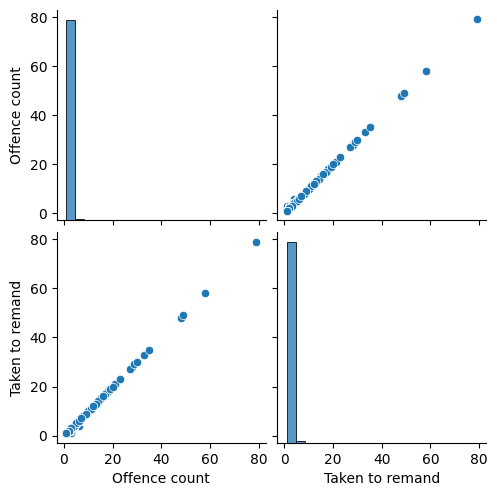

In [4]:
columns_to_plot = ["Offence count", "Taken to remand", "Postcode - Incident"]
sns.pairplot(data=data[columns_to_plot])


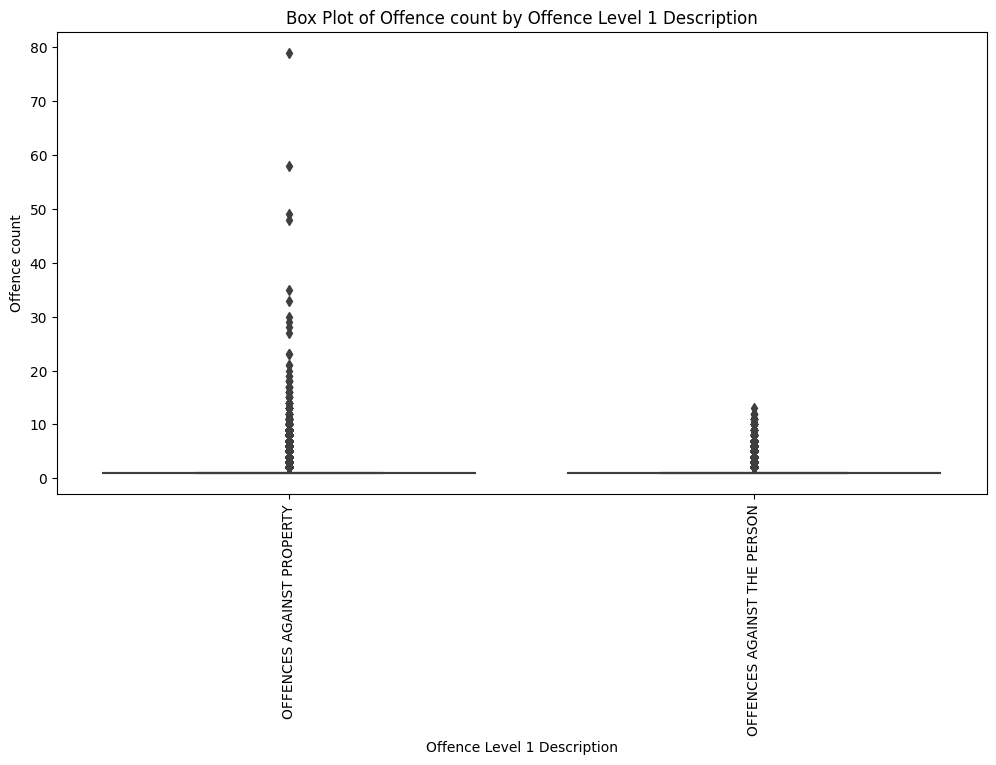

In [5]:
category_column = "Offence Level 1 Description"
columns_to_plot = ["Offence count", "Taken to remand"]
plt.figure(figsize=(12, 6))
sns.boxplot(x=category_column, y="Offence count", data=data)
plt.title("Box Plot of Offence count by Offence Level 1 Description")
plt.xticks(rotation=90)
plt.show()


***Histograms can show the distribution of "Offence count" and "Taken to remand" individually.***

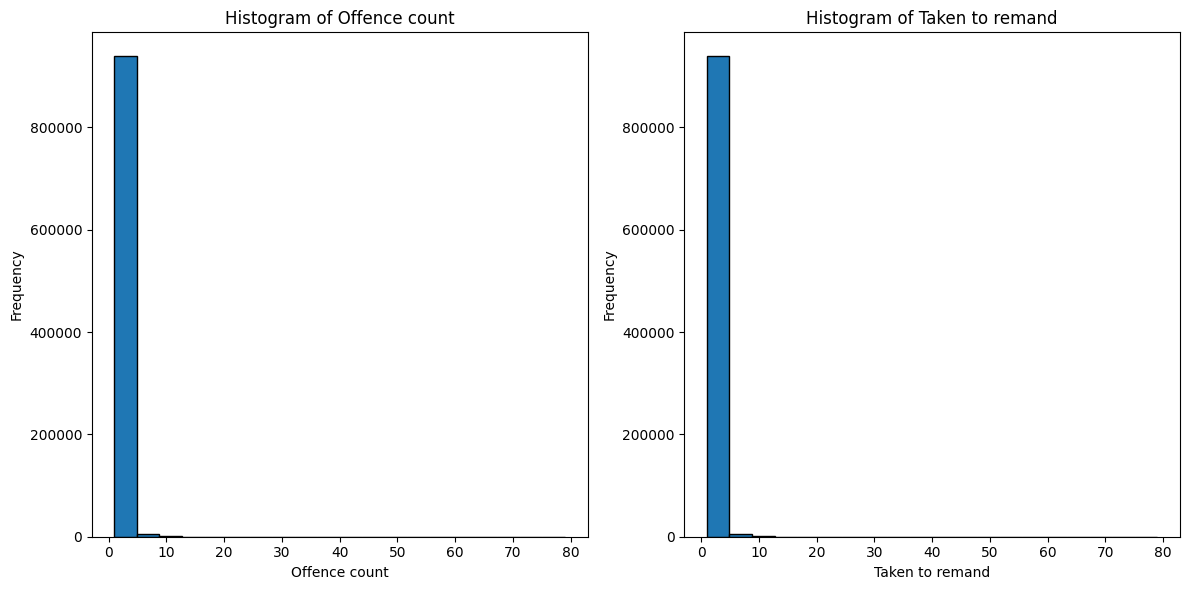

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data["Offence count"], bins=20, edgecolor='k')
plt.xlabel("Offence count")
plt.ylabel("Frequency")
plt.title("Histogram of Offence count")

plt.subplot(1, 2, 2)
plt.hist(data["Taken to remand"], bins=20, edgecolor='k')
plt.xlabel("Taken to remand")
plt.ylabel("Frequency")
plt.title("Histogram of Taken to remand")

plt.tight_layout()
plt.show()


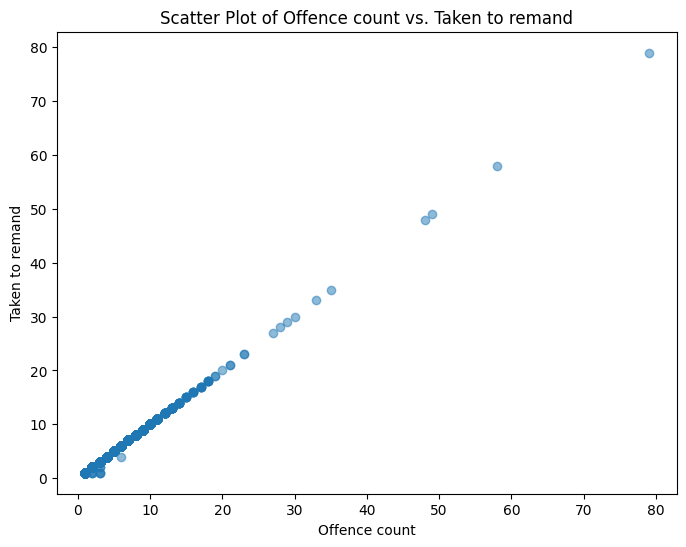

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Offence count"], data["Taken to remand"], alpha=0.5)
plt.xlabel("Offence count")
plt.ylabel("Taken to remand")
plt.title("Scatter Plot of Offence count vs. Taken to remand")
plt.show()


***A bar plot can show the average "Offence count" and "Taken to remand" for different values in a categorical column like "Offence Level 2 Description."***

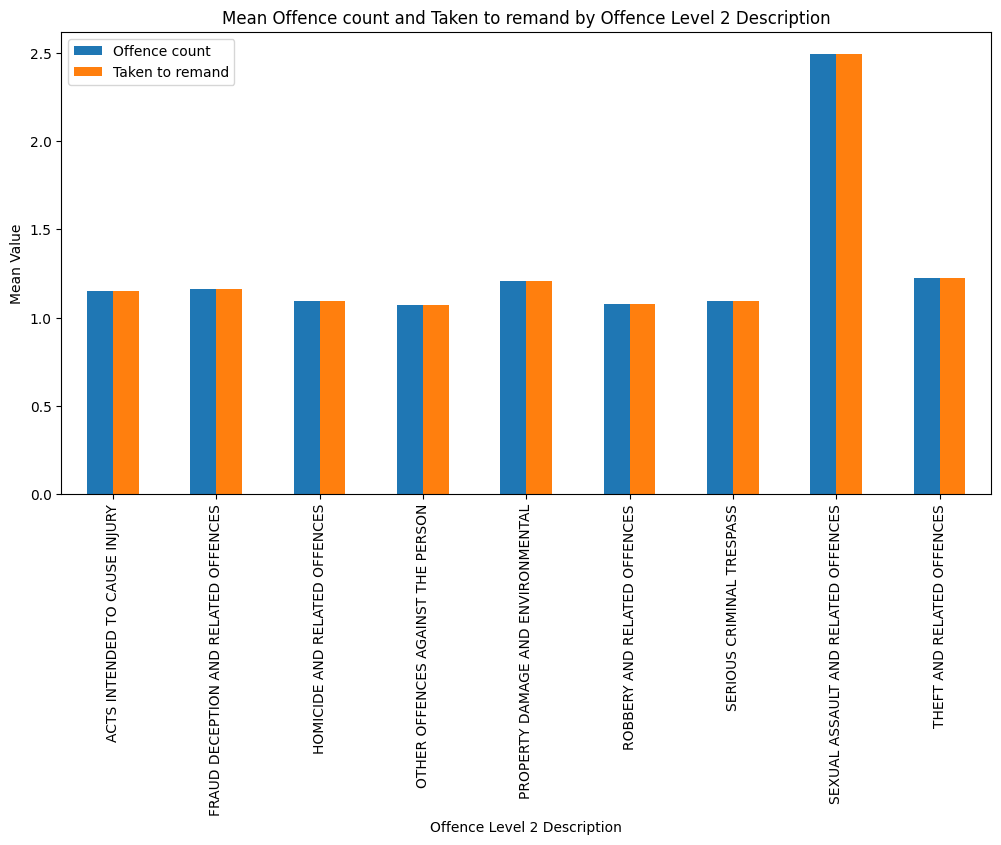

In [7]:
category_column = "Offence Level 2 Description"
columns_to_plot = ["Offence count", "Taken to remand"]
mean_values = data.groupby(category_column)[columns_to_plot].mean()
mean_values.plot(kind="bar", figsize=(12, 6))
plt.xlabel(category_column)
plt.ylabel("Mean Value")
plt.title("Mean Offence count and Taken to remand by " + category_column)
plt.xticks(rotation=90)
plt.show()


***Histogram of 'Offence count'***

Text(0, 0.5, 'Frequency')

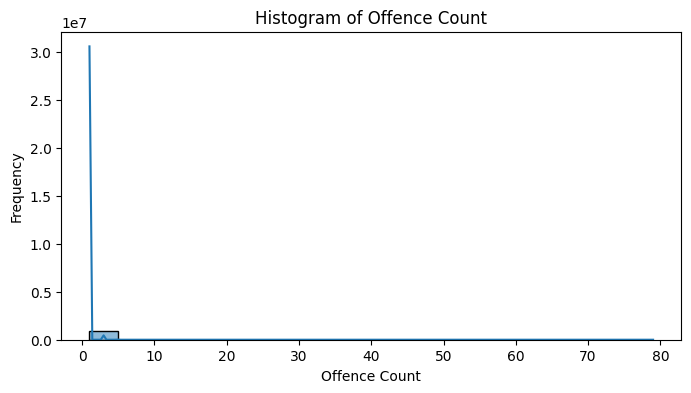

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Offence count'], bins=20, kde=True)
plt.title('Histogram of Offence Count')
plt.xlabel('Offence Count')
plt.ylabel('Frequency')


***Box plot of 'Offence count'***

Text(0.5, 1.0, 'Box Plot of Offence Count')

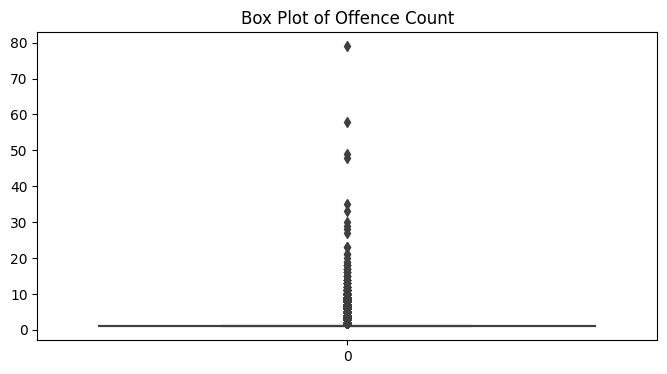

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['Offence count'])
plt.title('Box Plot of Offence Count')

In [11]:
# Step 2: Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Reported Date                     0
Suburb - Incident              2734
Postcode - Incident            4379
Offence Level 1 Description       0
Offence Level 2 Description       0
Offence Level 3 Description       0
Offence count                     0
Taken to remand                   0
dtype: int64


c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


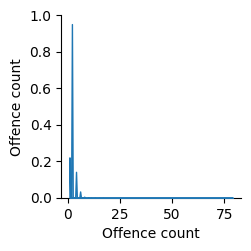

In [13]:
sns.pairplot(data[['Reported Date', 'Offence count', 'Postcode - Incident']], diag_kind='kde')

In [14]:
data.dropna(inplace=True)

In [15]:
data = pd.get_dummies(data, columns=['Suburb - Incident', 'Offence Level 1 Description', 'Offence Level 2 Description', 'Offence Level 3 Description'])

In [16]:
numeric_columns = ['Postcode - Incident', 'Offence count']

***Bar plot of 'Offence Level 1 Description'***

In [17]:
print(data.columns)


Index(['Reported Date', 'Postcode - Incident', 'Offence count',
       'Taken to remand', 'Suburb - Incident_ABERFOYLE PARK',
       'Suburb - Incident_ADELAIDE', 'Suburb - Incident_ADELAIDE AIRPORT',
       'Suburb - Incident_AGERY', 'Suburb - Incident_ALAWOONA',
       'Suburb - Incident_ALBERT PARK',
       ...
       'Offence Level 3 Description_Property damage by fire or explosion',
       'Offence Level 3 Description_Receive or handle proceeds of crime',
       'Offence Level 3 Description_SCT - Non Residence',
       'Offence Level 3 Description_SCT - Residence',
       'Offence Level 3 Description_Serious Assault not resulting in injury',
       'Offence Level 3 Description_Serious Assault resulting in injury',
       'Offence Level 3 Description_Theft from motor vehicle',
       'Offence Level 3 Description_Theft from shop',
       'Offence Level 3 Description_Theft/Illegal Use of MV',
       'Offence Level 3 Description_Threatening behaviour'],
      dtype='object', length=17

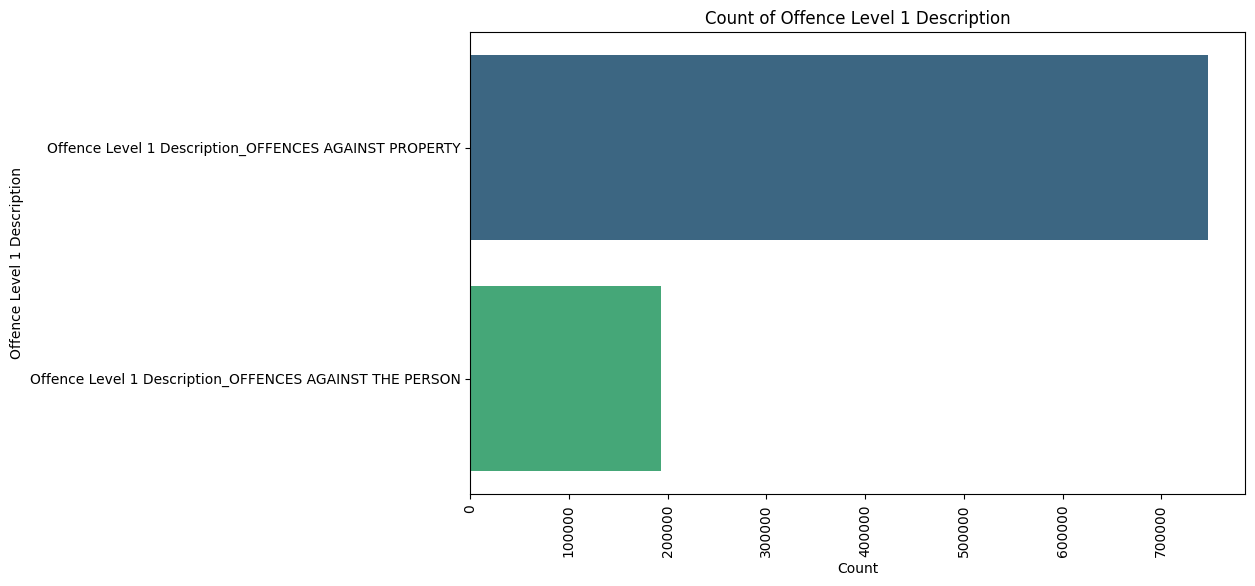

In [18]:
offence_level1_columns = [col for col in data.columns if 'Offence Level 1 Description' in col]
offence_level1_counts = data[offence_level1_columns].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=offence_level1_counts.values, y=offence_level1_counts.index, palette='viridis')
plt.title('Count of Offence Level 1 Description')
plt.xlabel('Count')
plt.ylabel('Offence Level 1 Description')
plt.xticks(rotation=90)
plt.show()

In [19]:
for column in numeric_columns:
    if not pd.api.types.is_numeric_dtype(data[column]):
        # Handle non-numeric values
        data[column] = pd.to_numeric(data[column], errors='coerce')
data.dropna(subset=numeric_columns, inplace=True)


***Bar plot of 'Offence Level 2 Description'***

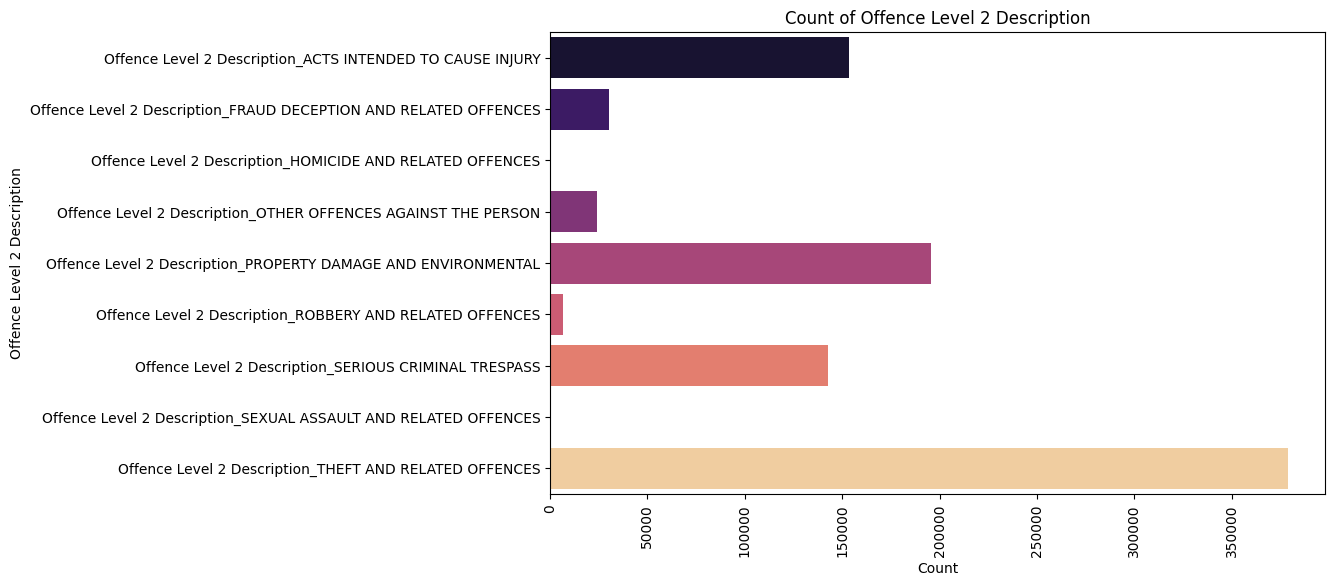

In [20]:
offence_level2_columns = [col for col in data.columns if 'Offence Level 2 Description' in col]
offence_level2_counts = data[offence_level2_columns].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=offence_level2_counts.values, y=offence_level2_counts.index, palette='magma')
plt.title('Count of Offence Level 2 Description')
plt.xlabel('Count')
plt.ylabel('Offence Level 2 Description')
plt.xticks(rotation=90)
plt.show()

In [21]:
data['Reported Date'] = pd.to_datetime(data['Reported Date'], format='%d/%m/%Y')
data.dropna(inplace=True)

In [22]:
data = original_data.copy()
pos = data[data['Offence Level 1 Description'] == 1]

pos_percentage = len(pos) / len(data)
neg_percentage = 1 - pos_percentage

print('positive instance percentage is', pos_percentage)
print('negative instance percentage is', neg_percentage)


positive instance percentage is 0.0
negative instance percentage is 1.0


***Violin plot of 'Offence count' vs. 'Offence Level 1 Description'***

(array([0, 1]),
 [Text(0, 0, 'OFFENCES AGAINST PROPERTY'),
  Text(1, 0, 'OFFENCES AGAINST THE PERSON')])

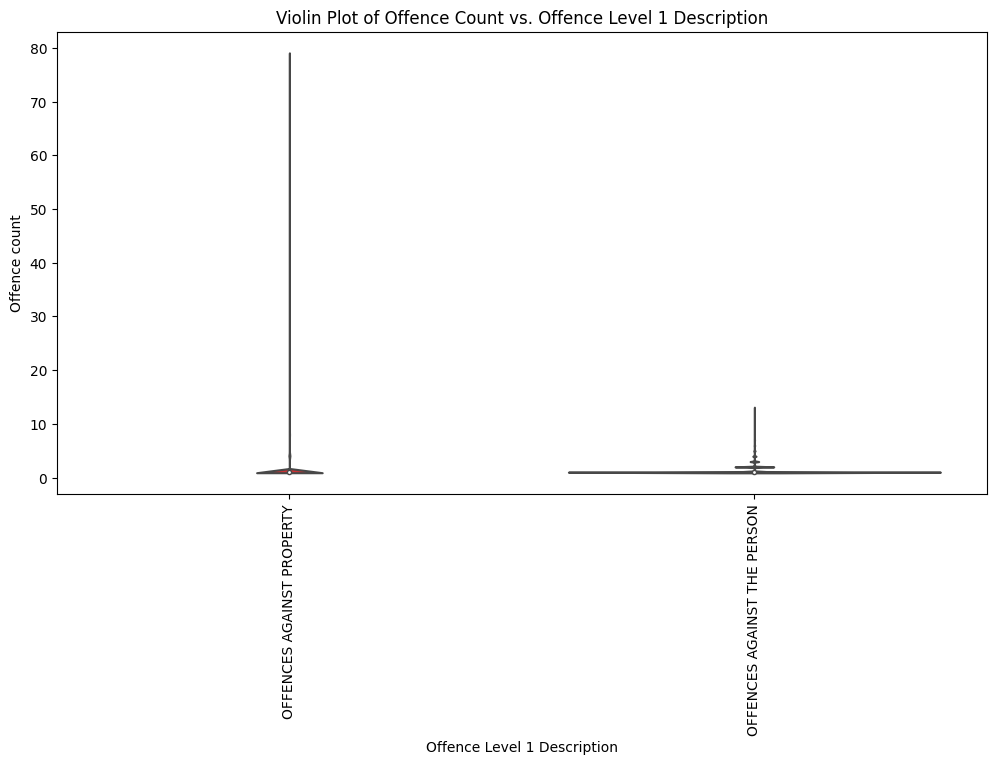

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Offence Level 1 Description', y='Offence count', palette='Set1')
plt.title('Violin Plot of Offence Count vs. Offence Level 1 Description')
plt.xticks(rotation=90)

Mean R-squared: 0.9508665127916311


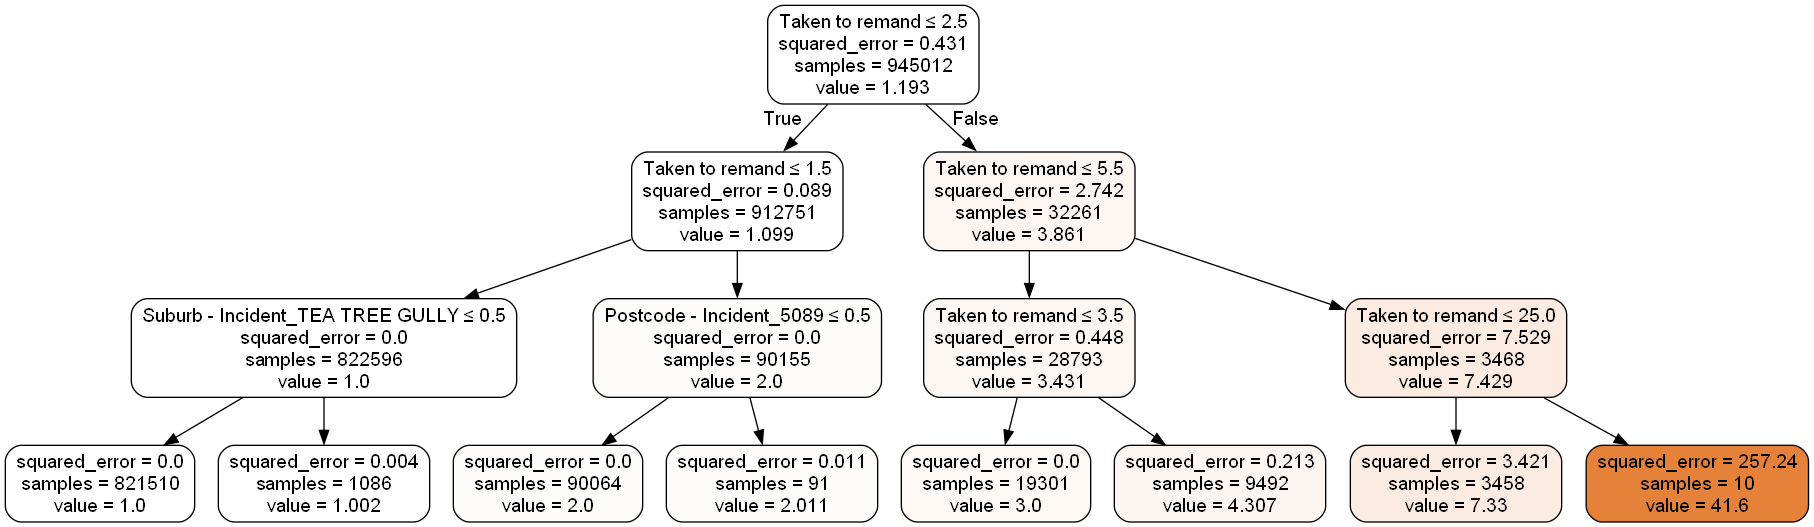

In [24]:
data['Reported Date'] = pd.to_datetime(data['Reported Date'], format='%d/%m/%Y')
Y = data['Offence count']

X = data.drop(['Reported Date', 'Offence count'], axis=1)
X = pd.get_dummies(X)
clf = DecisionTreeRegressor(max_depth=3)
scores = cross_val_score(clf, X, Y, cv=5, scoring='r2')  
print('Mean R-squared:', scores.mean())

clf.fit(X, Y)
feature_names = list(X.columns)
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree") 
Image(graph.render("decision_tree", format='png'))


***Time series plot of 'Reported Date' vs. 'Offence count'***

Text(0, 0.5, 'Offence Count')

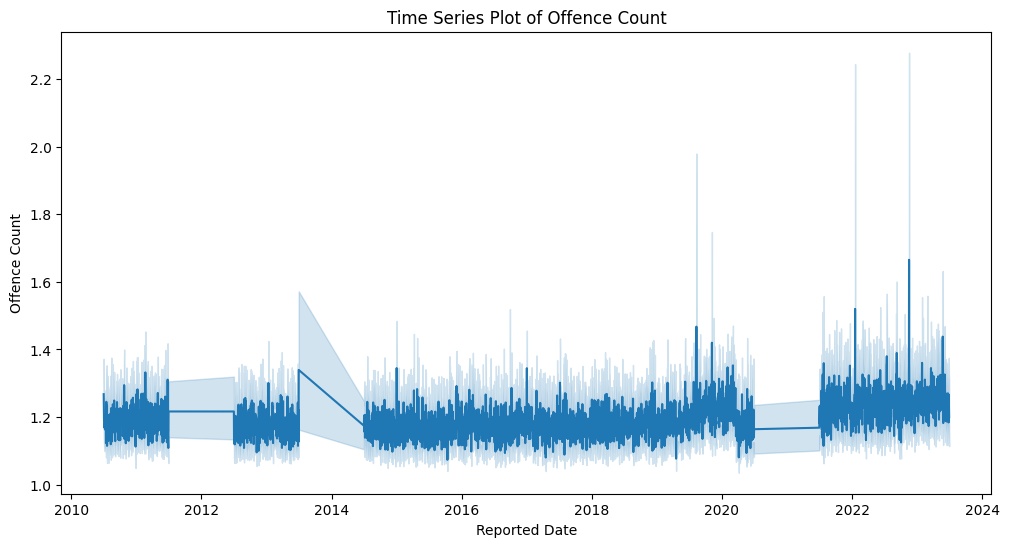

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Reported Date', y='Offence count')
plt.title('Time Series Plot of Offence Count')
plt.xlabel('Reported Date')
plt.ylabel('Offence Count')

(array([0, 1]),
 [Text(0, 0, 'OFFENCES AGAINST PROPERTY'),
  Text(1, 0, 'OFFENCES AGAINST THE PERSON')])

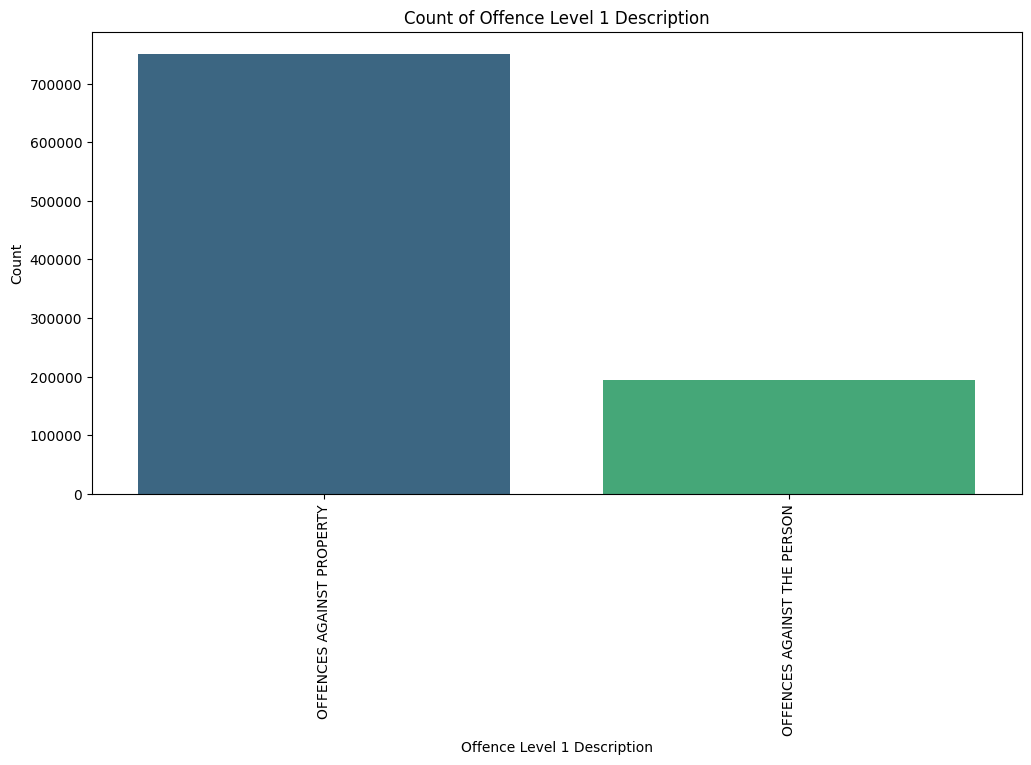

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Offence Level 1 Description', palette='viridis')
plt.title('Count of Offence Level 1 Description')
plt.xlabel('Offence Level 1 Description')
plt.ylabel('Count')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'FRAUD DECEPTION AND RELATED OFFENCES'),
  Text(1, 0, 'PROPERTY DAMAGE AND ENVIRONMENTAL'),
  Text(2, 0, 'SERIOUS CRIMINAL TRESPASS'),
  Text(3, 0, 'THEFT AND RELATED OFFENCES'),
  Text(4, 0, 'ACTS INTENDED TO CAUSE INJURY'),
  Text(5, 0, 'ROBBERY AND RELATED OFFENCES'),
  Text(6, 0, 'SEXUAL ASSAULT AND RELATED OFFENCES'),
  Text(7, 0, 'OTHER OFFENCES AGAINST THE PERSON'),
  Text(8, 0, 'HOMICIDE AND RELATED OFFENCES')])

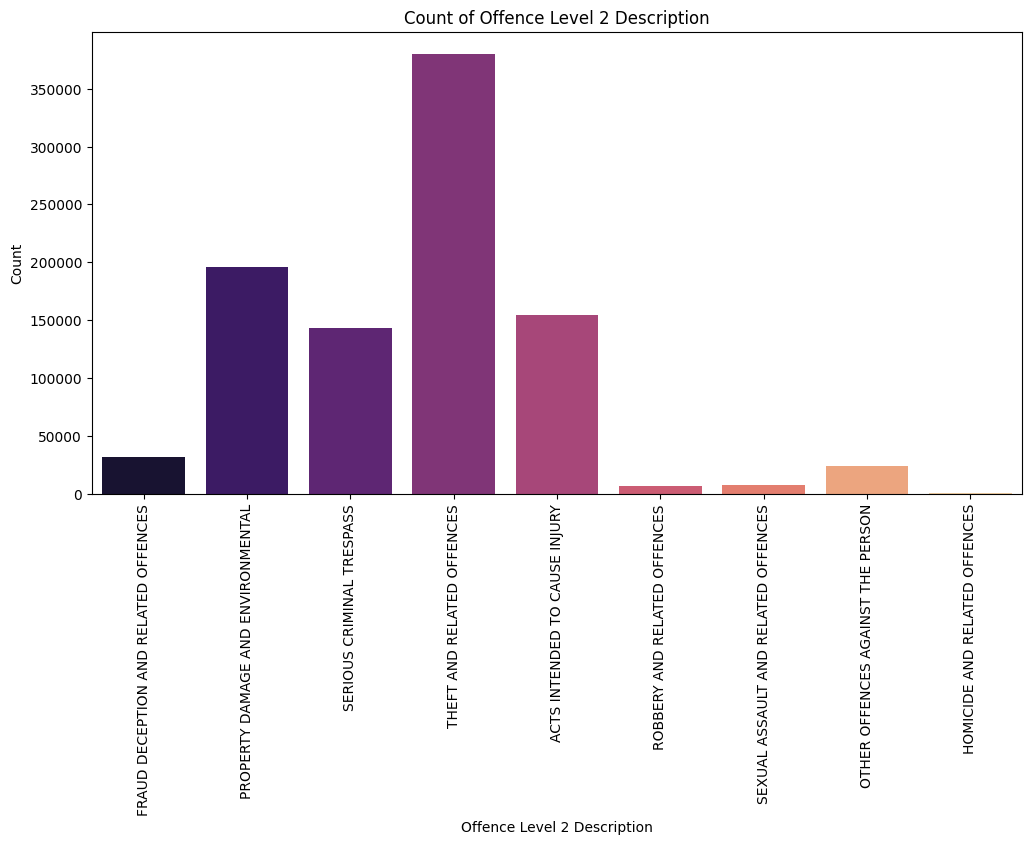

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Offence Level 2 Description', palette='magma')
plt.title('Count of Offence Level 2 Description')
plt.xlabel('Offence Level 2 Description')
plt.ylabel('Count')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

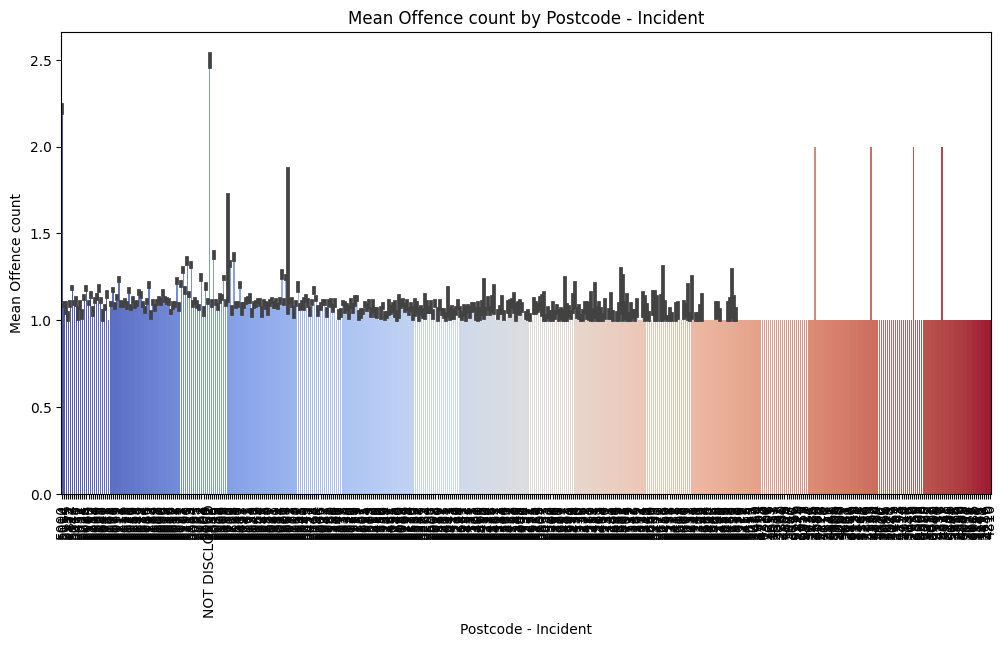

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Postcode - Incident', y='Offence count', palette='coolwarm')
plt.title('Mean Offence count by Postcode - Incident')
plt.xlabel('Postcode - Incident')
plt.ylabel('Mean Offence count')
plt.xticks(rotation=90)

***GaussianNB***

c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_sp

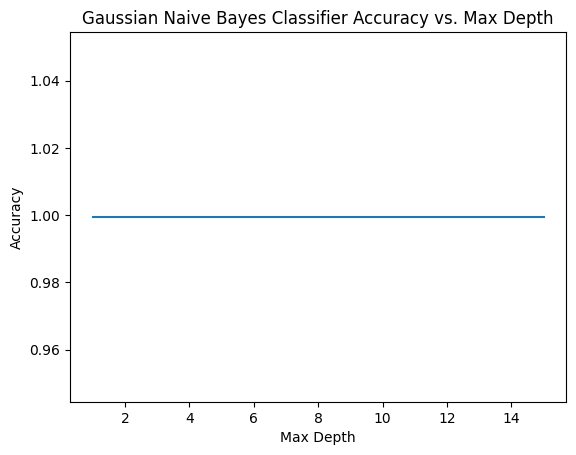

Accuracy Scores: [0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316, 0.9994920724494316]


In [29]:
sample_fraction = 0.1  
sampled_data = data.sample(frac=sample_fraction, random_state=42)
Y = sampled_data['Offence count']
X = sampled_data.drop(['Reported Date', 'Offence count'], axis=1)
X = pd.get_dummies(X)

k = 50  
selector = SelectKBest(chi2, k=k)
X_selected = selector.fit_transform(X, Y)

# Initialize empty lists for storing results
y = []
x = []

for i in range(1, 16):
    # Create and train a Gaussian Naive Bayes classifier
    clf = GaussianNB()
    scores = cross_val_score(clf, X_selected, Y, cv=10, scoring='accuracy')
    
    y.append(np.array(scores).mean())
    x.append(i)
plt.plot(x, y)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Gaussian Naive Bayes Classifier Accuracy vs. Max Depth')
plt.show()

print('Accuracy Scores:', y)


c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.9999682539682541
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     16511
           2       1.00      1.00      1.00      1759
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00       130
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1

    accuracy                           1.00     18901
   macro avg       1.00      1.00      1.00     18901
weighted avg       1.0

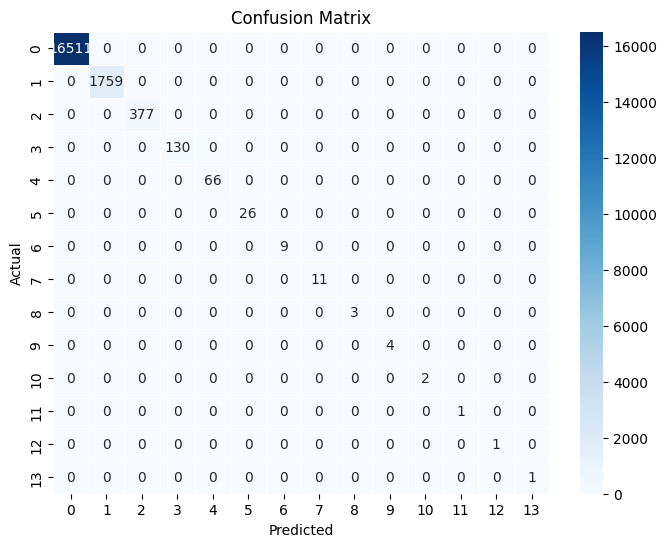

In [44]:
sample_fraction = 0.1 
sampled_data = data.sample(frac=sample_fraction, random_state=42)
Y = sampled_data['Offence count']
X = sampled_data[['Taken to remand']]
y = []

# Create and train a Gaussian Naive Bayes classifier with cross-validation
clf = GaussianNB()
scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
mean_accuracy = np.array(scores).mean()
print(f'Mean Accuracy: {mean_accuracy}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# Generate a classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


***Pie Chart of Class Distribution***

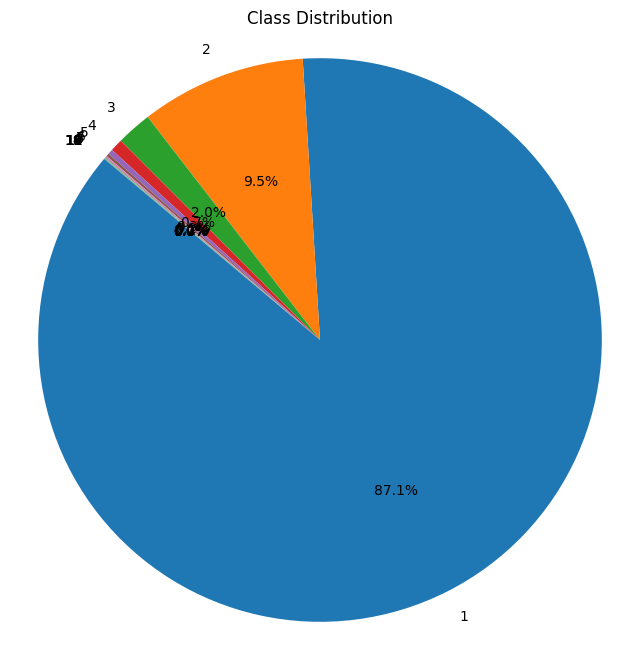

In [59]:
class_distribution = Y.value_counts()
labels = class_distribution.index
sizes = class_distribution.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()


***LinearSVC***

c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hadi3\AppData\Local\Programs\Python

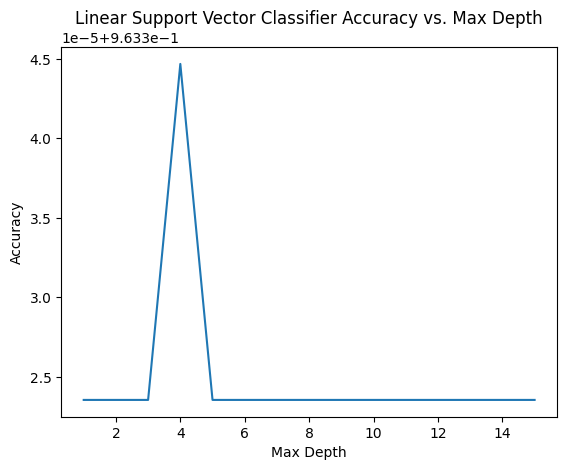

Accuracy Scores: [0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633446946349284, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065, 0.9633235328531065]


In [30]:
sample_fraction = 0.05  
sampled_data = data.sample(frac=sample_fraction, random_state=42)
Y = sampled_data['Offence count']
X = sampled_data.drop(['Reported Date', 'Offence count'], axis=1)
X = pd.get_dummies(X)
y = []
x = []

for i in range(1, 16):
    # Create and train a Linear Support Vector Classifier (LinearSVC)
    clf = LinearSVC(max_iter=1000)  
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')  
    y.append(np.array(scores).mean())
    x.append(i)

plt.plot(x, y)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Linear Support Vector Classifier Accuracy vs. Max Depth')
plt.show()

print('Accuracy Scores:', y)


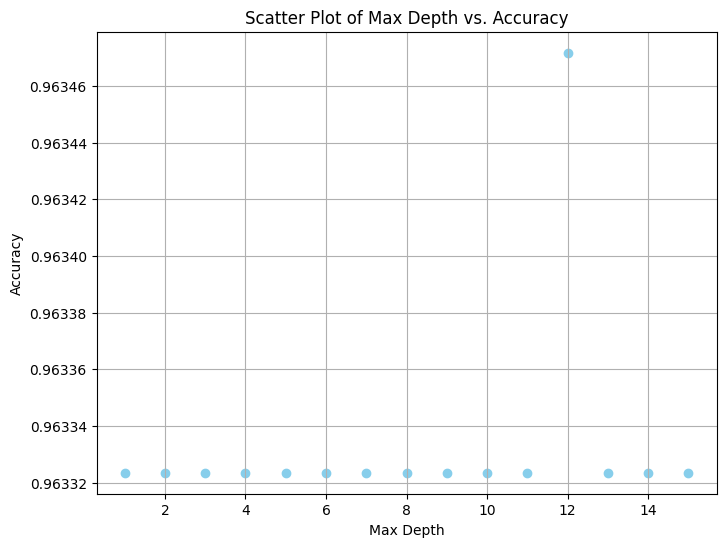

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Scatter Plot of Max Depth vs. Accuracy')
plt.grid(True)
plt.show()


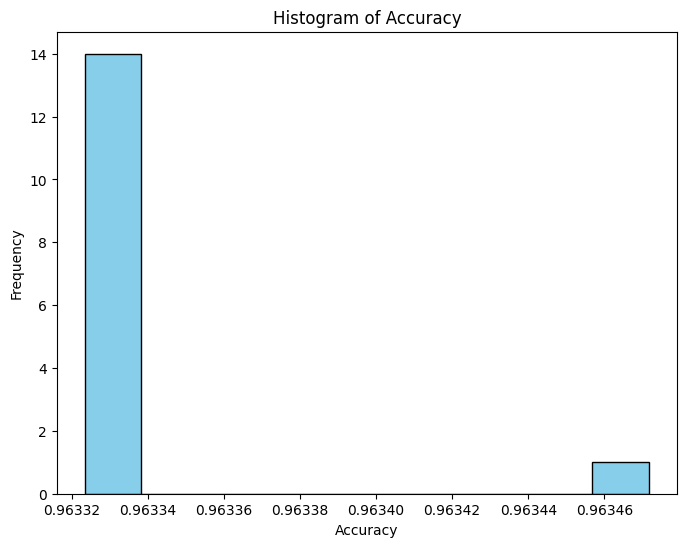

In [70]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy')
plt.show()

***RidgeCV***

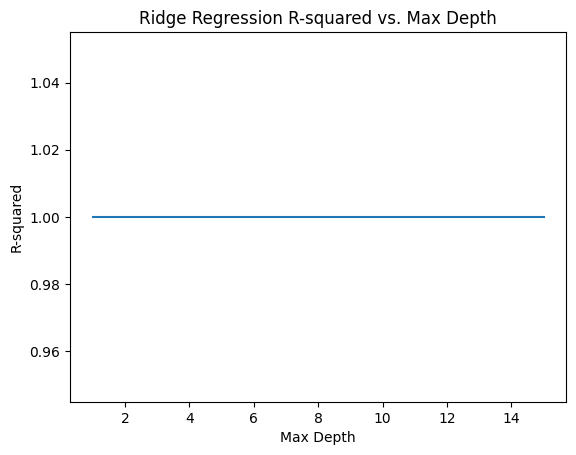

Optimal Alpha: 0.01
R-squared Scores: [0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117, 0.9999999999999117]


In [31]:
sample_fraction = 0.05
sampled_data = data.sample(frac=sample_fraction, random_state=42)
Y = sampled_data['Offence count']
X = sampled_data.drop(['Reported Date', 'Offence count'], axis=1)
X = pd.get_dummies(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a RidgeCV model with alpha values 
alphas = [0.01, 0.1, 1, 10, 100]  
clf = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the RidgeCV model
clf.fit(X_scaled, Y)
optimal_alpha = clf.alpha_
y = []
x = []

for i in range(1, 16):
   
    clf = Ridge(alpha=optimal_alpha)
    
    scores = cross_val_score(clf, X_scaled, Y, cv=5, scoring='r2', n_jobs=-1)  
    
    y.append(np.array(scores).mean())
    x.append(i)
plt.plot(x, y)
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('Ridge Regression R-squared vs. Max Depth')
plt.show()

print('Optimal Alpha:', optimal_alpha)
print('R-squared Scores:', y)


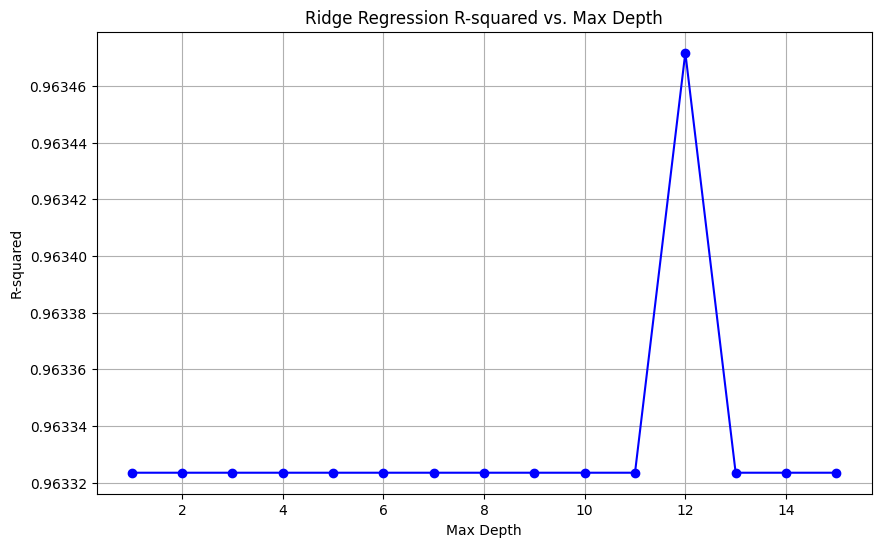

In [79]:
# Line Plot of R-squared vs. Max Depth
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('Ridge Regression R-squared vs. Max Depth')
plt.grid(True)
plt.show()

***Ridge Regression***

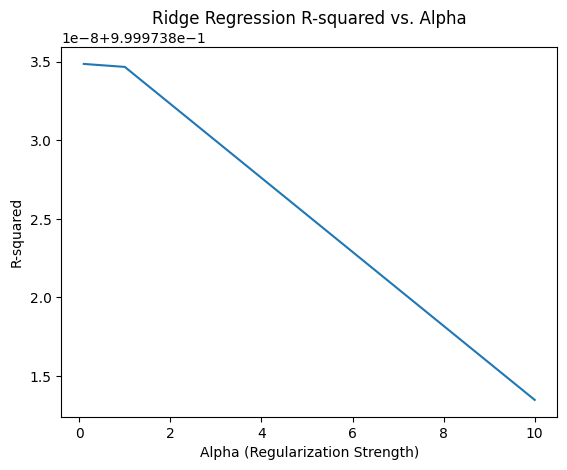

Best Alpha: 0.1
Best R-squared Score: 0.9999738348488488


In [90]:
sample_fraction = 0.1 
sampled_data = data.sample(frac=sample_fraction, random_state=42)
Y = sampled_data['Offence count']
X = sampled_data.drop(['Reported Date', 'Offence count'], axis=1)
X = pd.get_dummies(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize empty lists for storing results
y = []
alphas = [0.1, 1.0, 10.0]  

for alpha in alphas:
    
    clf = Ridge(alpha=alpha)
    
    scores = cross_val_score(clf, X_scaled, Y, cv=5, scoring='r2', n_jobs=-1)  # Utilize all CPU cores and fewer folds
    
    y.append(np.array(scores).mean())
plt.plot(alphas, y)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R-squared')
plt.title('Ridge Regression R-squared vs. Alpha')
plt.show()

print('Best Alpha:', alphas[np.argmax(y)])
print('Best R-squared Score:', max(y))


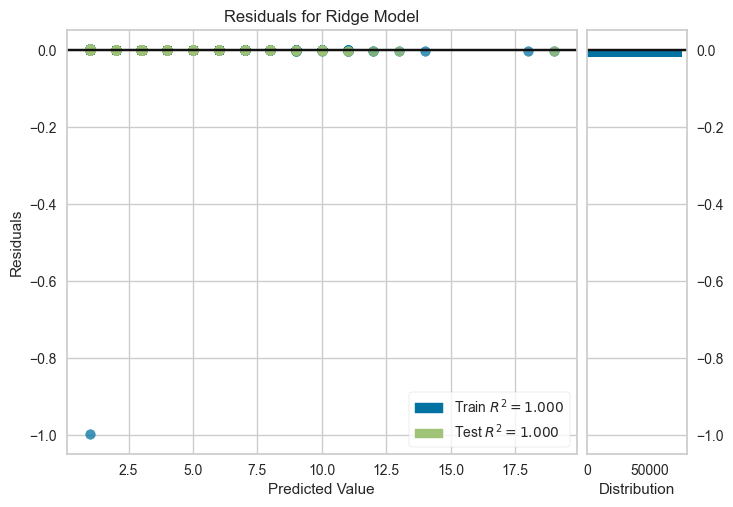

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [97]:
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Fit the model on the training data
clf.fit(X_train, Y_train)
visualizer = ResidualsPlot(clf)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()


***PCA&K-NN***

Mean Absolute Error: 0.00026453626792233216


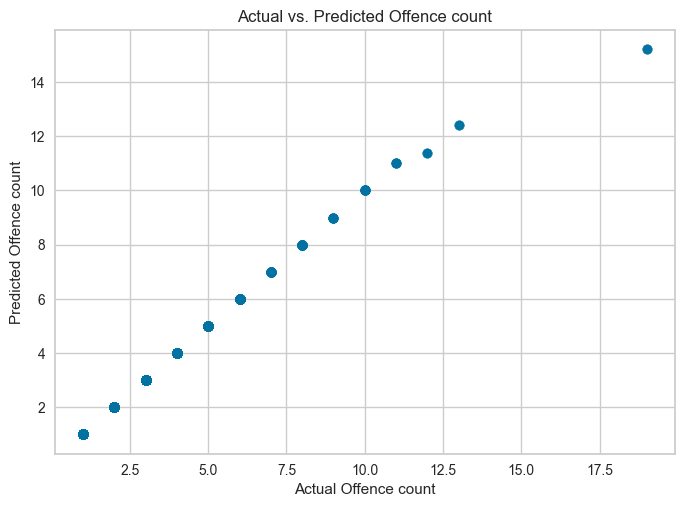

In [99]:
sample_fraction = 0.1  
sampled_data = data.sample(frac=sample_fraction, random_state=42)
selected_features = ['Offence count', 'Taken to remand']
X = sampled_data[selected_features]
Y = X['Offence count']
X = X.drop(['Offence count'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
n_components = min(X_scaled.shape[0], X_scaled.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Initialize and train a K-NN regressor
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# Calculate and print evaluation metrics
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error: {mae}')
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Offence count')
plt.ylabel('Predicted Offence count')
plt.title('Actual vs. Predicted Offence count')
plt.show()


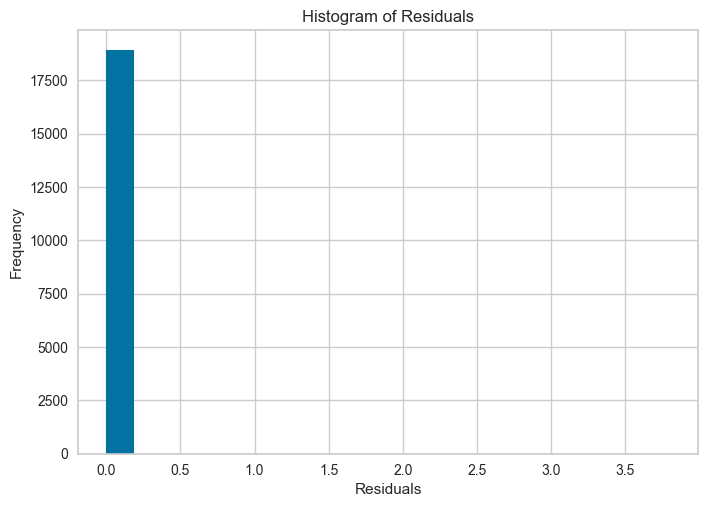

In [101]:
residuals = Y_test - Y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


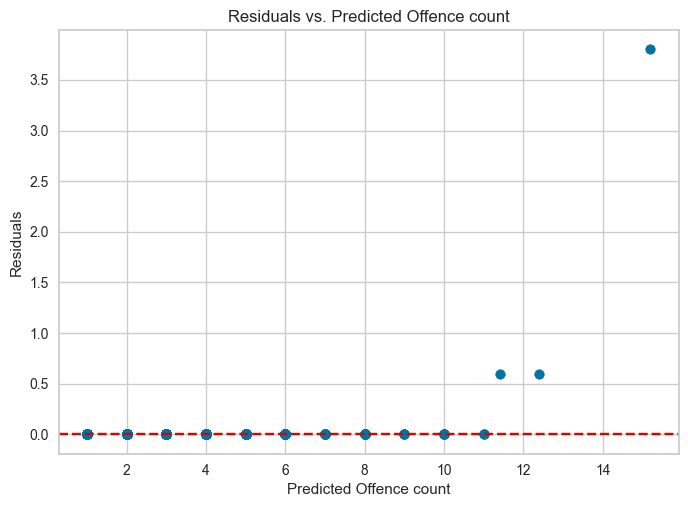

In [102]:
plt.scatter(Y_pred, residuals)
plt.xlabel('Predicted Offence count')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Offence count')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


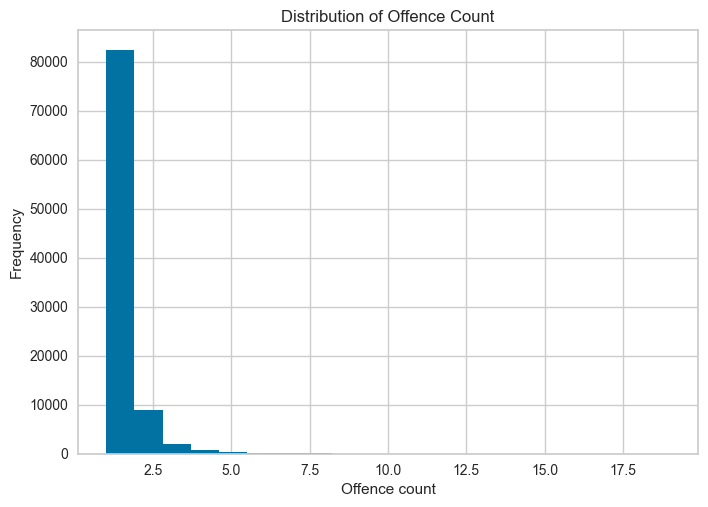

In [103]:
plt.hist(Y, bins=20)
plt.xlabel('Offence count')
plt.ylabel('Frequency')
plt.title('Distribution of Offence Count')
plt.show()

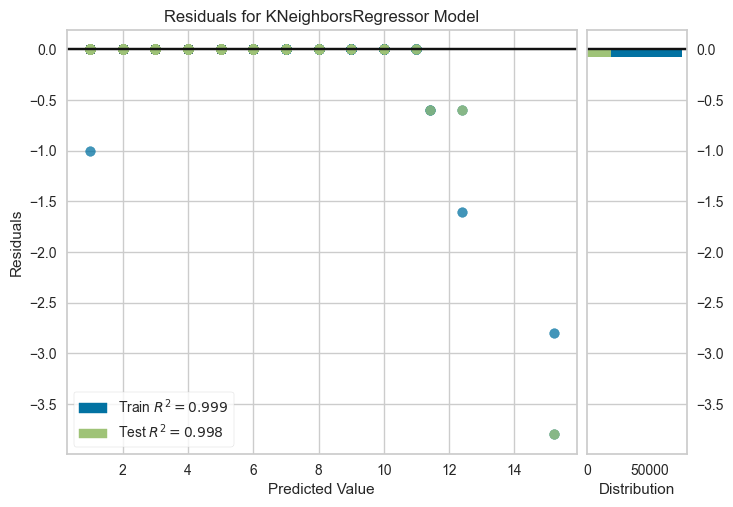

<Axes: title={'center': 'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from yellowbrick.regressor import ResidualsPlot

# Initialize and train a K-NN regressor
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
visualizer = ResidualsPlot(knn)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()

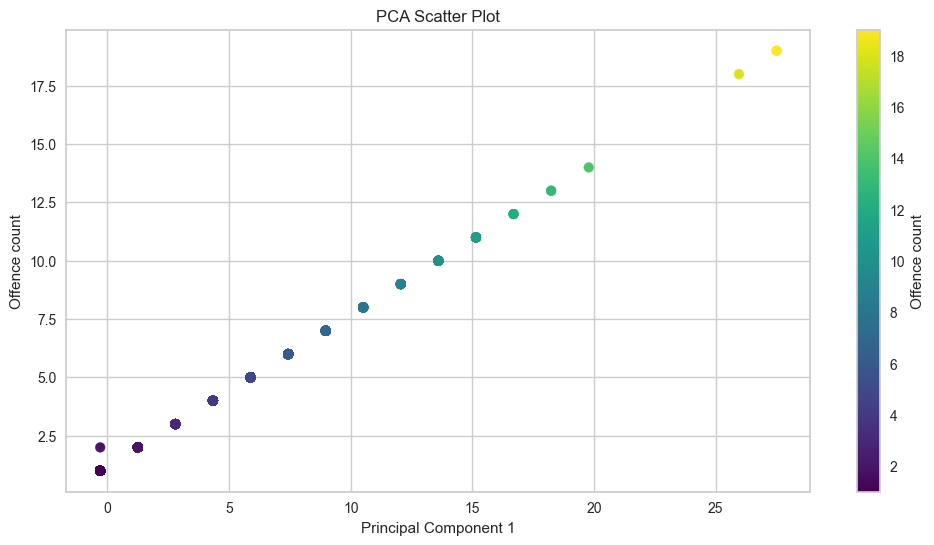

In [110]:
# Principal Component Analysis (PCA) Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], Y, c=Y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Offence count')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Offence count')
plt.show()


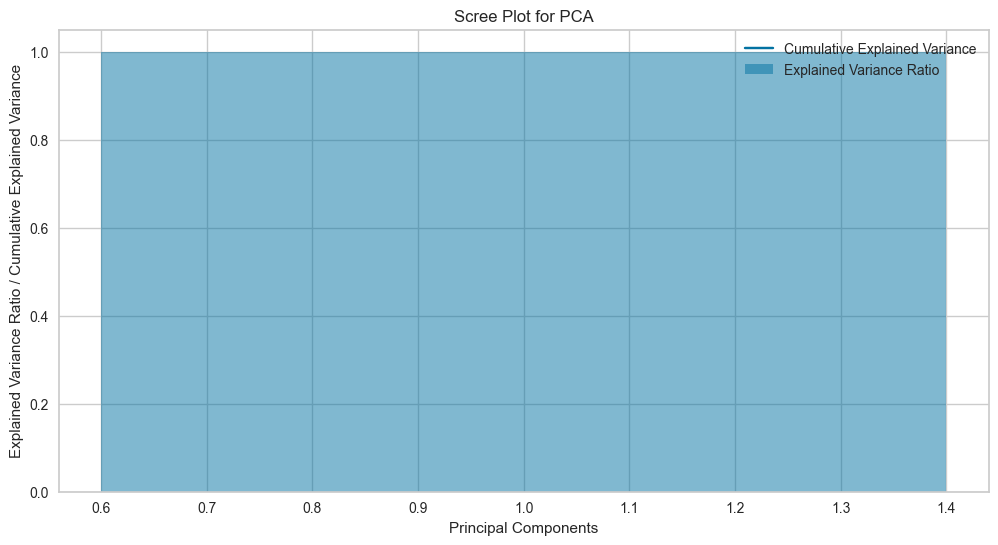

In [113]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
n_components = min(X_scaled.shape[0], X_scaled.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.5, align='center', label='Explained Variance Ratio')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.legend()
plt.show()

***Models Comparison***

c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

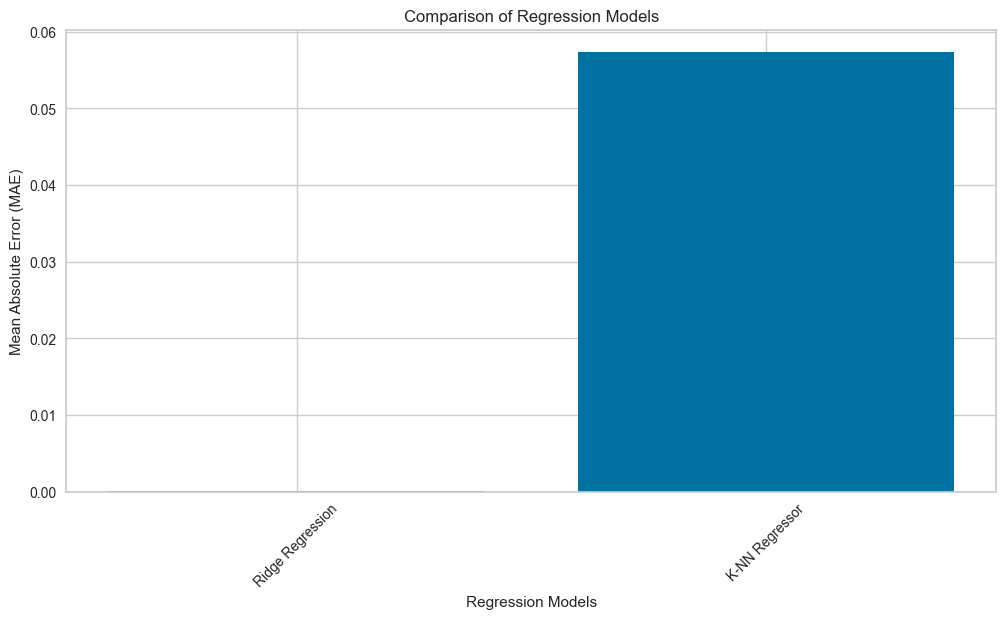

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16511
           2       0.99      0.99      0.99      1759
           3       0.99      0.96      0.97       377
           4       0.94      0.95      0.94       130
           5       0.87      0.88      0.87        66
           6       0.88      0.85      0.86        26
           7       1.00      0.44      0.62         9
           8       1.00      0.82      0.90        11
           9       1.00      0.67      0.80         3
          10       0.75      0.75      0.75         4
          11       0.33      0.50      0.40         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1

    accuracy                           1.00     18901
   macro avg       0.70      0.63      0.65     18901
weighted avg       1.00     

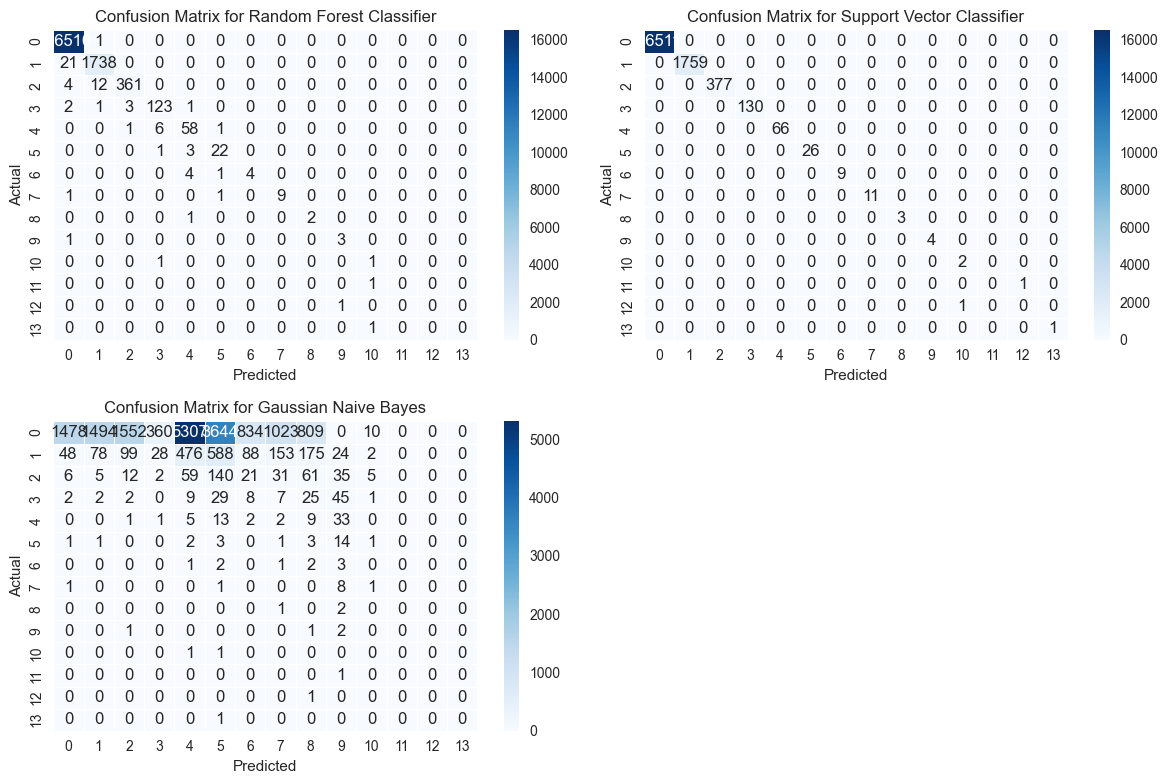

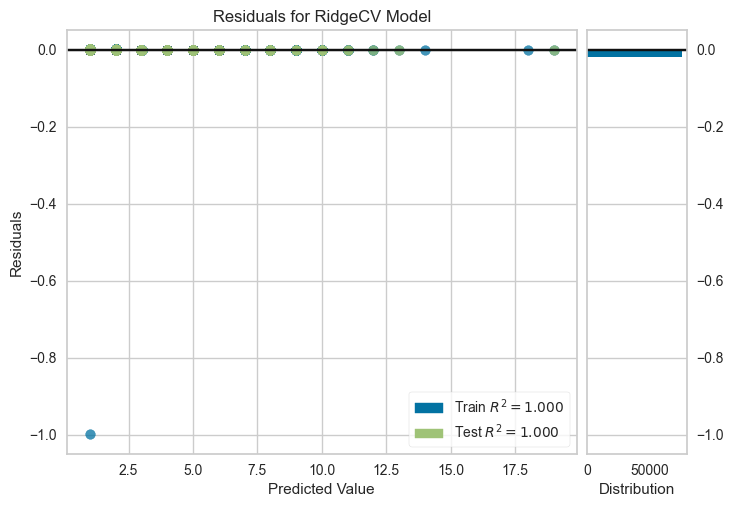

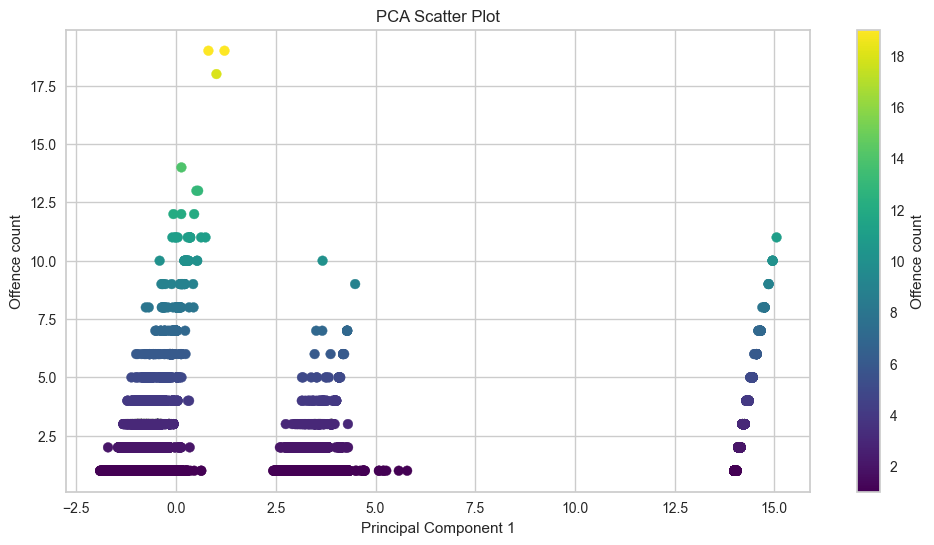

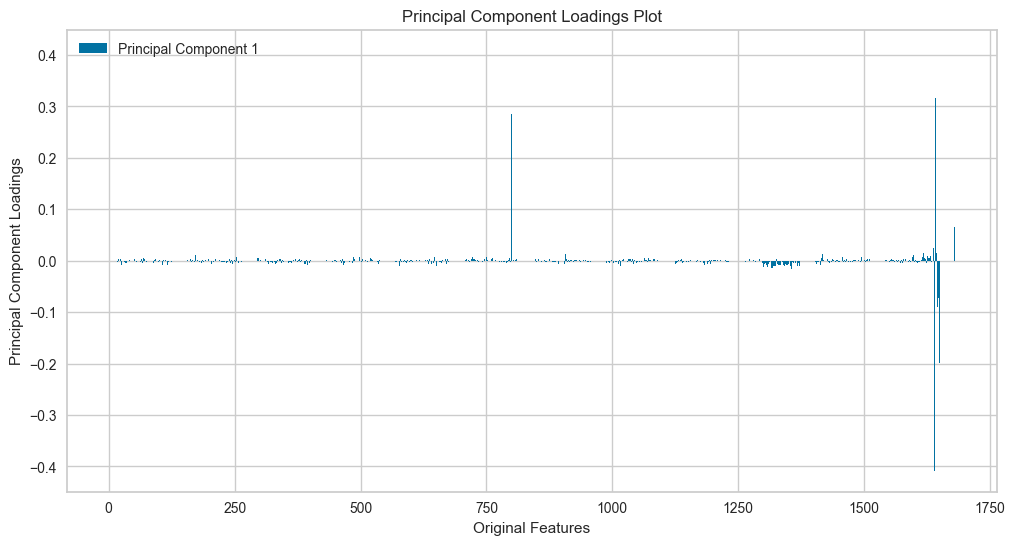

In [117]:
sample_fraction = 0.1  
sampled_data = data.sample(frac=sample_fraction, random_state=42)
Y_regression = sampled_data['Offence count']
X_regression = sampled_data.drop(['Reported Date', 'Offence count'], axis=1)
X_regression = pd.get_dummies(X_regression)

# Define your target variable and features for classification
Y_classification = sampled_data['Taken to remand']  
X_classification = sampled_data.drop(['Reported Date', 'Taken to remand'], axis=1)
X_classification = pd.get_dummies(X_classification)
regression_results = {}
classification_results = {}

# Standardize features for regression
scaler_regression = StandardScaler()
X_scaled_regression = scaler_regression.fit_transform(X_regression)

# Standardize features for classification
scaler_classification = StandardScaler()
X_scaled_classification = scaler_classification.fit_transform(X_classification)

# Perform PCA for regression
n_components_regression = min(X_scaled_regression.shape[0], X_scaled_regression.shape[1])
pca_regression = PCA(n_components=n_components_regression)
X_pca_regression = pca_regression.fit_transform(X_scaled_regression)

# Split the data into training and testing sets for regression
X_train_regression, X_test_regression, Y_train_regression, Y_test_regression = train_test_split(
    X_pca_regression, Y_regression, test_size=0.2, random_state=42
)

# Perform PCA for classification
n_components_classification = min(X_scaled_classification.shape[0], X_scaled_classification.shape[1])
pca_classification = PCA(n_components=n_components_classification)
X_pca_classification = pca_classification.fit_transform(X_scaled_classification)

# Split the data into training and testing sets for classification
X_train_classification, X_test_classification, Y_train_classification, Y_test_classification = train_test_split(
    X_pca_classification, Y_classification, test_size=0.2, random_state=42
)

# Models for Regression
regression_models = {
    'Ridge Regression': RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], store_cv_values=True),
    'K-NN Regressor': KNeighborsRegressor(n_neighbors=5),
}

# Models for Classification
classification_models = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(kernel='linear'),
    'Gaussian Naive Bayes': GaussianNB(),
}

# Train and evaluate regression models
for model_name, model in regression_models.items():
    model.fit(X_train_regression, Y_train_regression)
    Y_pred_regression = model.predict(X_test_regression)
    mae = mean_absolute_error(Y_test_regression, Y_pred_regression)
    regression_results[model_name] = mae

# Train and evaluate classification models
for model_name, model in classification_models.items():
    model.fit(X_train_classification, Y_train_classification)
    Y_pred_classification = model.predict(X_test_classification)
    class_report = classification_report(Y_test_classification, Y_pred_classification)
    conf_matrix = confusion_matrix(Y_test_classification, Y_pred_classification)
    classification_results[model_name] = {'classification_report': class_report, 'confusion_matrix': conf_matrix}

# Visualization 1: Compare MAE of Regression Models
plt.figure(figsize=(12, 6))
plt.bar(regression_results.keys(), regression_results.values())
plt.xlabel('Regression Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Classification Report for Classification Models
for model_name, results in classification_results.items():
    print(f"Classification Report for {model_name}:\n{results['classification_report']}")

# Visualization 3: Confusion Matrix Heatmap for Classification Models
plt.figure(figsize=(12, 8))
for i, (model_name, results) in enumerate(classification_results.items(), start=1):
    plt.subplot(2, 2, i)
    sns.heatmap(results['confusion_matrix'], annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
plt.tight_layout()
plt.show()

# Visualization 4: Residual Plots for Ridge Regression
ridge_regression = regression_models['Ridge Regression']
visualizer = ResidualsPlot(ridge_regression)
visualizer.fit(X_train_regression, Y_train_regression)
visualizer.score(X_test_regression, Y_test_regression)
visualizer.show()

# Visualization 5: PCA Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_pca_regression[:, 0], Y_regression, c=Y_regression, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Offence count')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Offence count')
plt.show()

# Visualization 6: Principal Component Loadings Plot
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_components_regression + 1), pca_regression.components_[0], label='Principal Component 1')
plt.xlabel('Original Features')
plt.ylabel('Principal Component Loadings')
plt.title('Principal Component Loadings Plot')
plt.legend()
plt.show()
